## Task 1: Exploratory Data Analysis (EDA) and Business Insights

#### 1. Introduction
The eCommerce Transactions Dataset comprises three key tables: 
    Customers, Products, and Transactions. 

The objective of this analysis is to perform Exploratory Data Analysis (EDA) 
    to uncover patterns, trends, and actionable insights to help 
    improve business strategies.


#### 2. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#### 3. Load datasets


In [2]:
customers = pd.read_csv(r'dataset/Customers.csv')
products = pd.read_csv(r'dataset/Products.csv')
transactions = pd.read_csv(r'dataset/Transactions.csv')

#### 4. Exploratory Data Analysis (EDA)


##### 4.1 Data Insepection

#### Customer .csv

In [3]:
customers.head(3)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [5]:
customers.duplicated().sum()

0

##### Products.csv

In [6]:
products.head(3)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12


In [7]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [8]:
products.duplicated().sum()

0

##### Transactions.csv

In [9]:
transactions.head(3)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68


In [10]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [11]:
transactions.duplicated().sum()

0

#### 4.2 Data Vizualisation 

#### Customer .csv

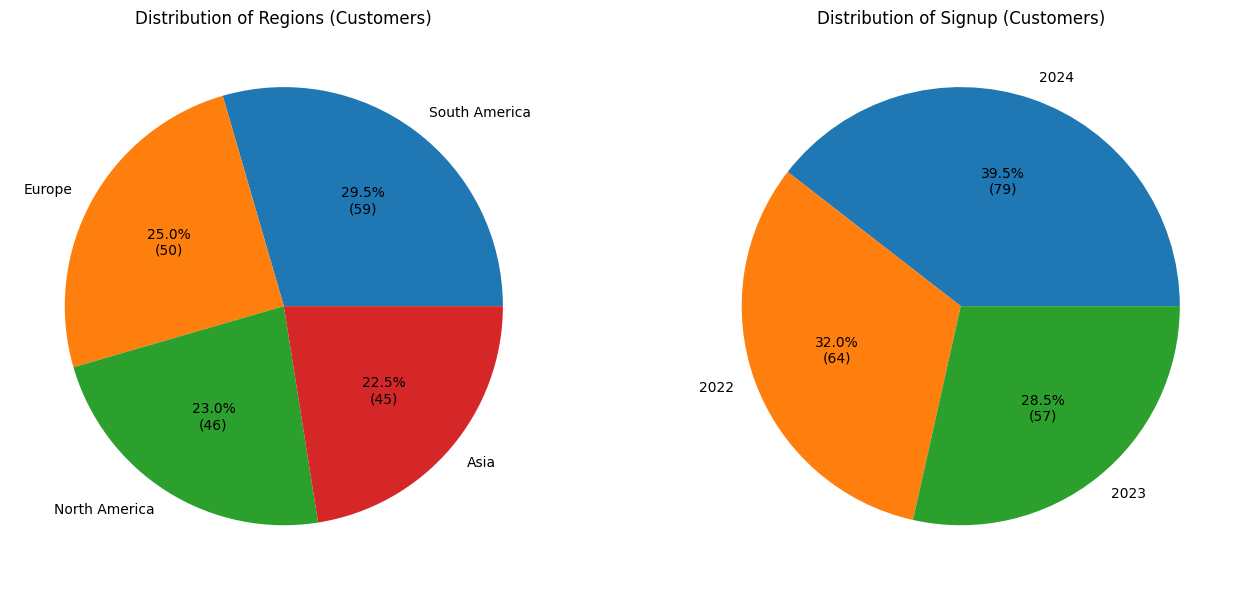

In [27]:
# Count customers by region
region_counts = customers['Region'].value_counts()

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
signup_trends = customers['SignupDate'].dt.year.value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
def autopct_with_count(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{pct:.1f}%\n({absolute})"

axes[0].pie(region_counts, labels=region_counts.index, autopct=lambda pct: autopct_with_count(pct, region_counts))
axes[0].set_title('Distribution of Regions (Customers)')


axes[1].pie(signup_trends, labels=signup_trends.index, autopct=lambda pct: autopct_with_count(pct, signup_trends))
axes[1].set_title('Distribution of Signup (Customers)')
plt.tight_layout()
plt.show()

##### Products.csv

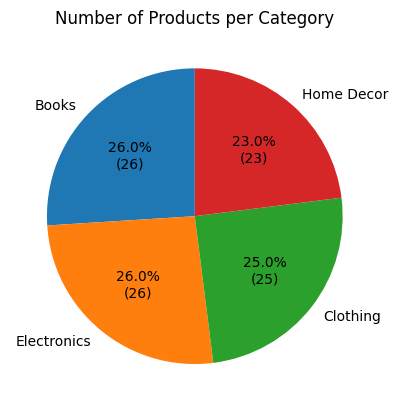

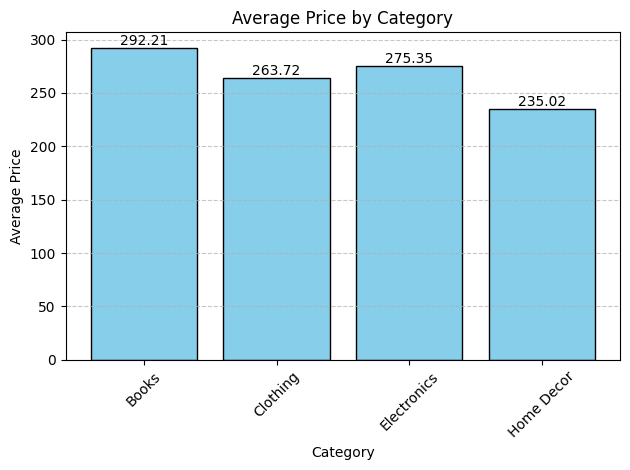

In [28]:
category_counts = products["Category"].value_counts()
plt.pie(category_counts.values, labels=category_counts.index, autopct=
        lambda pct: autopct_with_count(pct, category_counts), startangle=90)
plt.title("Number of Products per Category")
plt.show()


category_avg_price = products.groupby('Category')['Price'].mean()
bars = plt.bar(category_avg_price.index, category_avg_price, color='skyblue', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')


plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Transactions.csv

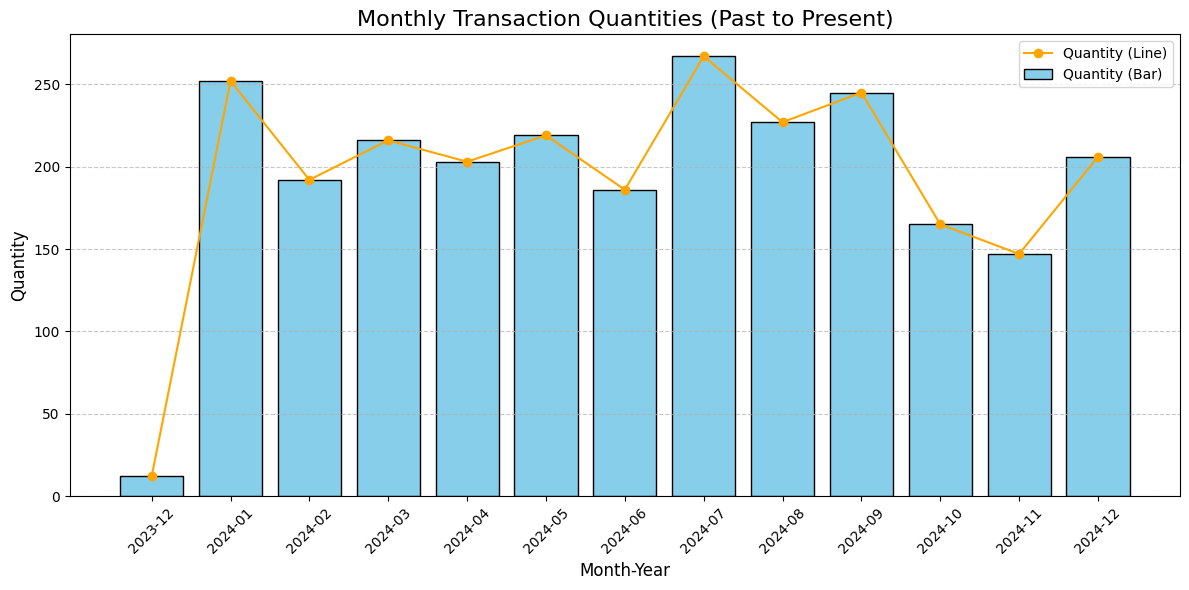

In [15]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
quantity_by_month = transactions.groupby('YearMonth')['Quantity'].sum()
quantity_by_month.index = quantity_by_month.index.astype(str)

bars = plt.bar(quantity_by_month.index, quantity_by_month, color='skyblue', edgecolor='black', label='Quantity (Bar)')
plt.plot(quantity_by_month.index, quantity_by_month, color='orange', marker='o', label='Quantity (Line)')

plt.title('Monthly Transaction Quantities (Past to Present)')
plt.xlabel('Month-Year')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [32]:
# Top Selling Product
top_selling_product = transactions.groupby("ProductID")["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False)
print("Top Selling Product:")
print(top_selling_product.head(1))
print('-'*30)
# Average Spending per Customer
avg_spending_customer = transactions.groupby("CustomerID")["TotalValue"].mean().reset_index().rename(columns={"TotalValue": "AverageSpending"})
print("\nAverage Spending per Customer:")
print(avg_spending_customer.head(10))

Top Selling Product:
   ProductID  Quantity
58      P059        46
------------------------------

Average Spending per Customer:
  CustomerID  AverageSpending
0      C0001       670.904000
1      C0002       465.685000
2      C0003       681.345000
3      C0004       669.360000
4      C0005       678.080000
5      C0006      1056.892500
6      C0007       859.940000
7      C0008       427.161000
8      C0009       298.833333
9      C0010       429.387500
